In [1]:
import pandas as pd
import numpy as np

# 从Excel文件中加载数据
df = pd.read_excel('player1noset1.xlsx') 
df.head()

,match_id,player1,server,p1_winner,p1_unf_err,p1_net_pt_won,p1_break_pt_missed,p1_points_won,set_no,F
0,2023-wimbledon-1301,Carlos Alcaraz,2,0,0,0,0,34,2,0.185294
1,2023-wimbledon-1301,Carlos Alcaraz,2,0,0,0,0,34,2,0.185294
2,2023-wimbledon-1301,Carlos Alcaraz,2,0,0,0,0,34,2,0.185294
3,2023-wimbledon-1301,Carlos Alcaraz,2,0,0,0,0,34,2,0.185294
4,2023-wimbledon-1301,Carlos Alcaraz,1,1,0,0,0,35,2,0.332028


In [2]:
df=df.drop('match_id',axis=1)
df=df.drop('player1',axis=1)
df=df.drop('set_no',axis=1)
df=df.drop('p1_points_won',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   server              904 non-null    int64  
 1   p1_winner           904 non-null    int64  
 2   p1_unf_err          904 non-null    int64  
 3   p1_net_pt_won       904 non-null    int64  
 4   p1_break_pt_missed  904 non-null    int64  
 5   F                   904 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 42.5 KB


In [3]:
df['server'] = df['server'].replace({1:1, 2: 0})
df.head()

,server,p1_winner,p1_unf_err,p1_net_pt_won,p1_break_pt_missed,F
0,0,0,0,0,0,0.185294
1,0,0,0,0,0,0.185294
2,0,0,0,0,0,0.185294
3,0,0,0,0,0,0.185294
4,1,1,0,0,0,0.332028


In [4]:
df['server'].value_counts()

0    477
1    427
Name: server, dtype: int64

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import graphviz
from IPython.display import Image


# 将F列作为目标变量，A至E列作为特征
X = df[['server', 'p1_winner', 'p1_unf_err', 'p1_net_pt_won', 'p1_break_pt_missed']]
y = df['F']

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建决策树回归模型
#regressor = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
regressor = DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_features=None,
                                  min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0,
                                  max_depth=10, min_impurity_decrease=0, ccp_alpha=0.0, max_leaf_nodes=None, random_state=None,
                                  )

regressor.fit(X_train, y_train)



# 预测测试集
predict = regressor.predict(X_test)

# 输出回归模型的准确率等信息
print('回归树准确率：', regressor.score(X_test, y_test))
print('回归树r2_score：', r2_score(y_test, predict))
print('回归树二乘偏差均值：', mean_squared_error(y_test, predict))
print('回归树绝对值偏差均值：', mean_absolute_error(y_test, predict))


回归树准确率： 0.9877635374581727
回归树r2_score： 0.9877635374581727
回归树二乘偏差均值： 6.891245374446392e-05
回归树绝对值偏差均值： 0.00618279677000643


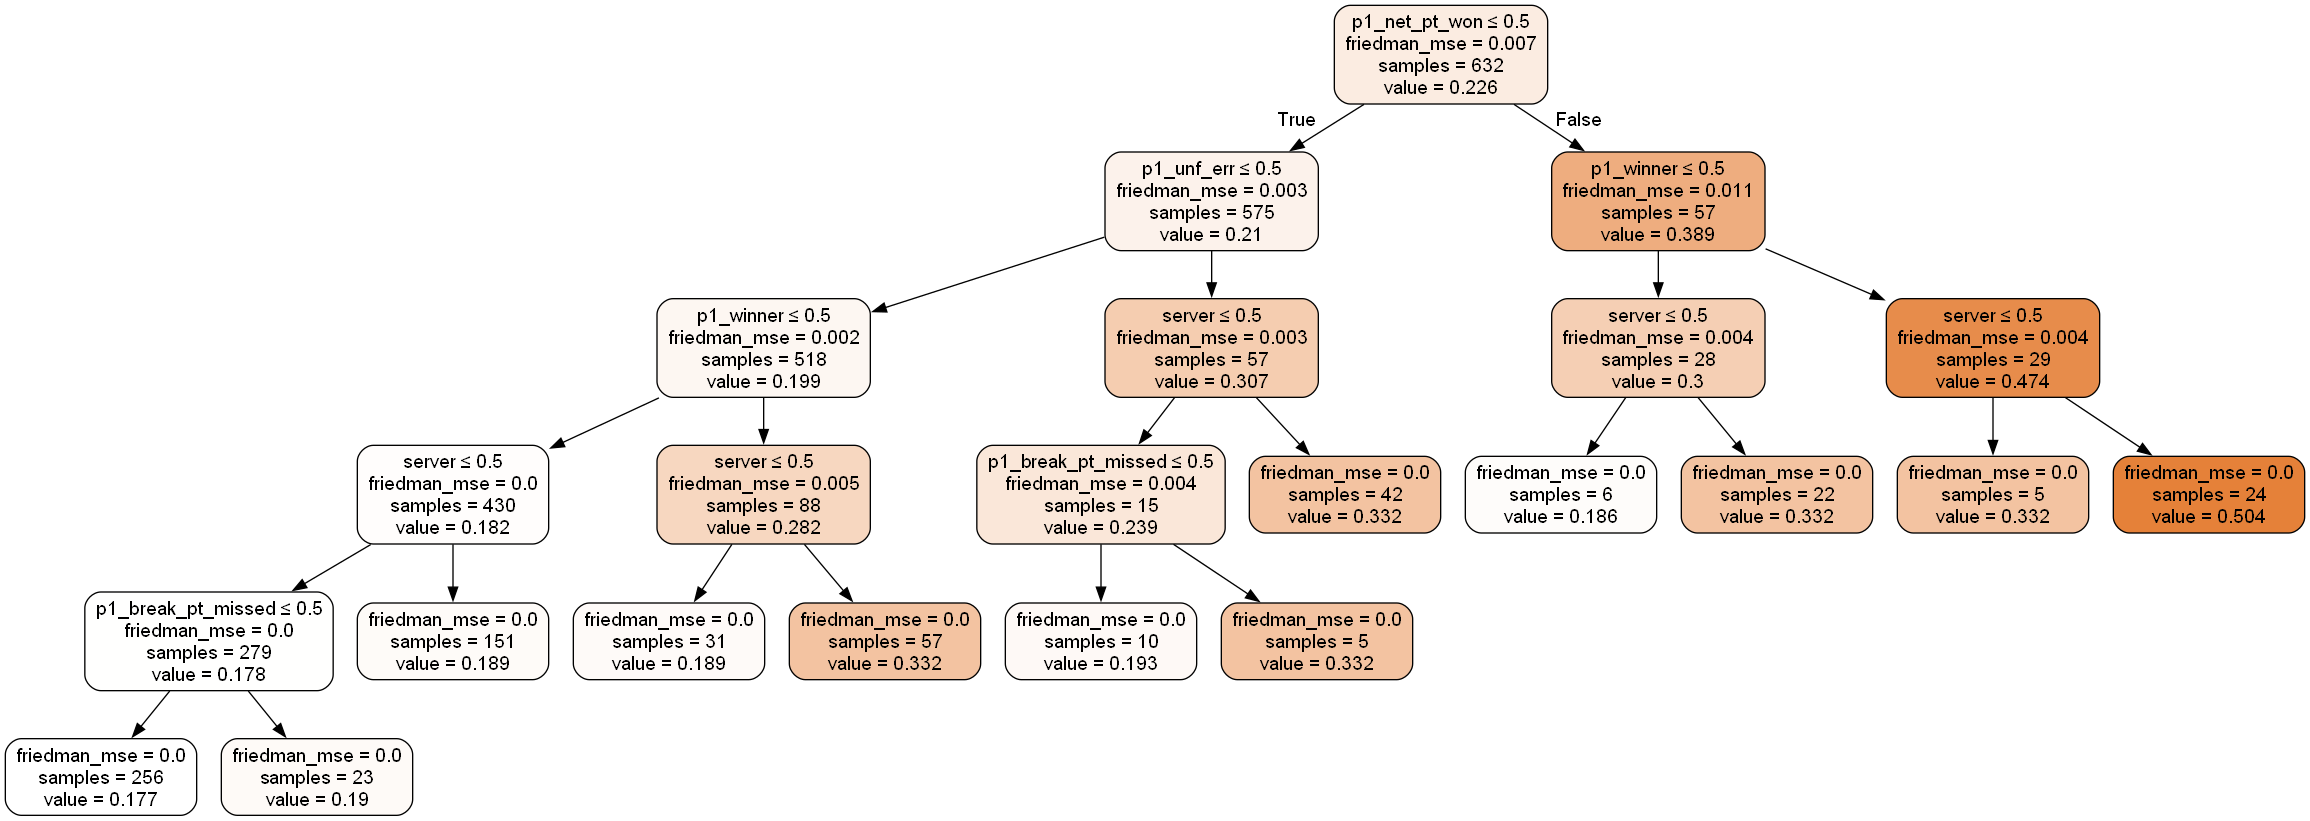

In [6]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz

# 使用graphviz库可视化决策树，并保存为PNG文件
dot_data = export_graphviz(regressor, out_file=None, 
                           feature_names=X.columns,
                           filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data, format="png")  # 保存为PNG格式
graph.render("testtree", view=False)  # 保存为PNG文件，不显示窗口
Image(filename="testtree.png")


In [7]:
print(len(predict))

272


C:\Users\蒋\AppData\Local\Temp\ipykernel_27524\768031753.py:14: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(data=df_results, dashes=False, palette=colors)


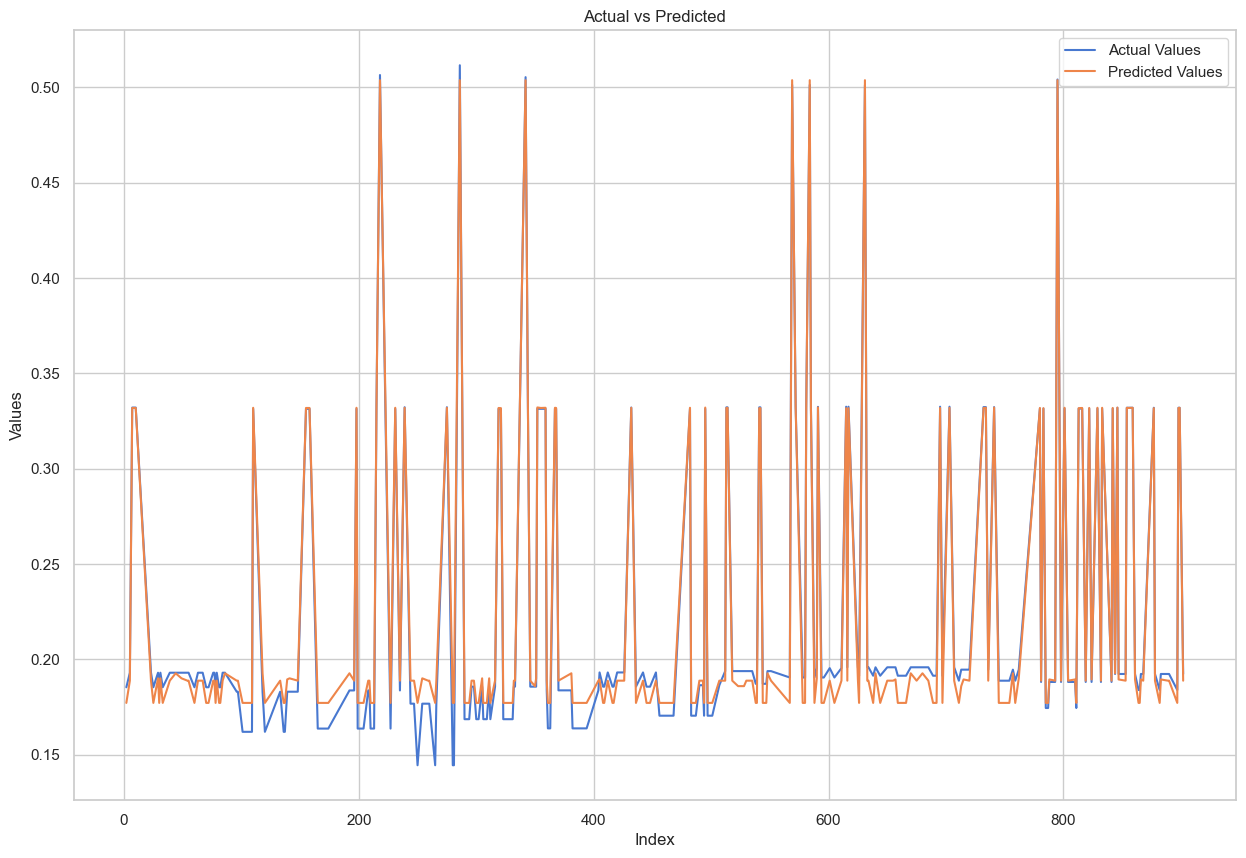

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 创建数据框
df_results = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': predict})
sns.set_theme(style='whitegrid')

# 使用Seaborn提供的'colorblind'配色
colors = sns.color_palette('muted')

plt.figure(figsize=(15, 10))
# 绘制预测值和测试值的曲线图，指定颜色
sns.lineplot(data=df_results, dashes=False, palette=colors)
plt.title('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()


In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
# Cross-Validation
cv_scores = cross_val_score(regressor, X, y, cv=5, scoring='r2')  # 5-fold cross-validation
print('交叉验证R-squared scores:', cv_scores)
print('平均交叉验证R-squared:', np.mean(cv_scores))

交叉验证R-squared scores: [0.98443753 0.9712659  0.99351701 0.97911082 0.9929921 ]
平均交叉验证R-squared: 0.9842646705910777
